<a href="https://colab.research.google.com/github/Amar1701/DataScienceIntern/blob/main/NumberPlateDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.5 MB/s eta 0:00:00


In [ ]:
import cv2
from matplotlib import pyplot as plt

import numpy as np
import imutils
import easyocr

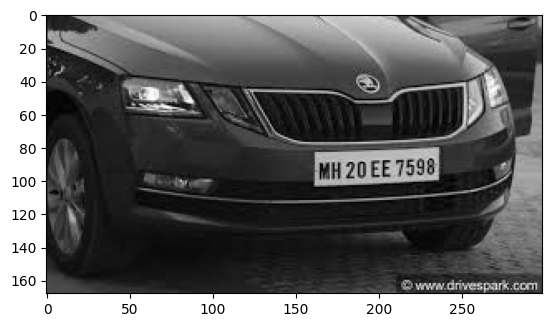

In [ ]:
img = cv2.imread("/content/numPlate.jpeg")
#img = cv2.imread("/content/noplate.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

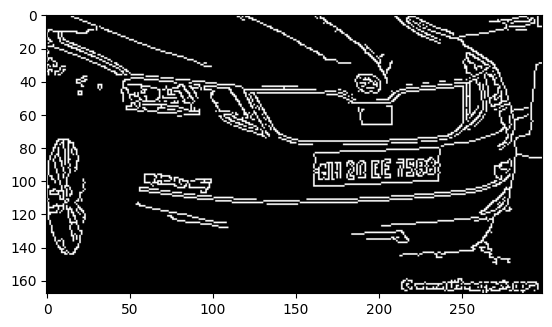

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

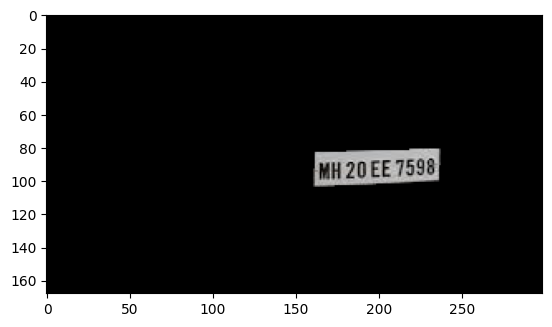

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

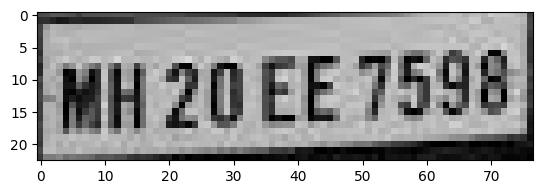

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
import easyocr

# Load the EasyOCR model with the desired language(s)
reader = easyocr.Reader(['en'])  # 'en' for English; you can add more languages if needed

# Perform OCR on the cropped license plate image
result = reader.readtext(cropped_image)

# Display the recognized text
for detection in result:
    text = detection[1]
    print(text)

MH2OEE 7598


In [ ]:
import easyocr
import pandas as pd

# Load the EasyOCR model with the desired language(s)
reader = easyocr.Reader(['en'])  # 'en' for English; you can add more languages if needed

# Perform OCR on the cropped license plate image
result = reader.readtext(cropped_image)

# Extract the recognized text from the OCR results
recognized_text = [detection[1] for detection in result]

# Save the recognized text to a CSV file
data = {'License_Plate_Text': recognized_text}
df = pd.DataFrame(data)

# Change the file name to whatever you prefer
output_file = 'recognized_text.csv'
df.to_csv(output_file, index=False)

print("Extracted text saved to:", output_file)


Extracted text saved to: recognized_text.csv


In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("recognized_text.csv")

# Now you can work with the data in the DataFrame
print(df)


  License_Plate_Text
0        MH2OEE 7598


In [ ]:
import cv2
import easyocr
import pandas as pd

# Load the EasyOCR model with the desired language(s)
reader = easyocr.Reader(['en'])  # 'en' for English; you can add more languages if needed

# Function to extract license plate regions from a frame
def extract_license_plate(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply preprocessing, edge detection, and contour detection to identify license plates
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour (assuming it's the license plate)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)

    # Extract the license plate from the frame
    cropped_license_plate = frame[y:y+h, x:x+w]

    return cropped_license_plate

# Open the video file
video_path = '/content/tollPlaza.mp4'
cap = cv2.VideoCapture(video_path)

# Initialize an empty list to store the recognized text
recognized_text_list = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Extract license plate region from the frame
    cropped_license_plate = extract_license_plate(frame)

    # Perform OCR on the cropped license plate image
    result = reader.readtext(cropped_license_plate)

    # Extract the recognized text from the OCR results
    recognized_text = [detection[1] for detection in result]

    # Save the recognized text to the list
    recognized_text_list.extend(recognized_text)

# Release the video capture object
cap.release()

# Create a DataFrame from the recognized text list
data = {'License_Plate_Text': recognized_text_list}
df = pd.DataFrame(data)

# Save the recognized text to a CSV file
output_file = 'recognized_text_from_video.csv'
df.to_csv(output_file, index=False)

print("Extracted text from video saved to:", output_file)


Extracted text from video saved to: recognized_text_from_video.csv


In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("recognized_text_from_video.csv")

# Now you can work with the data in the DataFrame
print(df)

    License_Plate_Text
0          VP 16CZ2323
1           VP16cZ2323
2          Up 16c72323
3          Up 16c72323
4          Up 16c72323
..                 ...
327                87J
328               lilt
329                 HR
330               87 J
331               lilt

[332 rows x 1 columns]


In [ ]:
# Assuming you have a list of ground truth text for each license plate in the video
ground_truth = ['VP 16cZ2323', 'HR 87J 4141']  # Replace with actual ground truth

# Assuming you have the recognized text from your license plate recognition system
recognized_text_list = ['VP 16CZ2323','HR 87J 4141']  # Replace with the actual recognized text list

# Ensure the length of both lists is the same
assert len(ground_truth) == len(recognized_text_list)

# Calculate accuracy
correct_count = sum(1 for gt, recognized in zip(ground_truth, recognized_text_list) if gt == recognized)
total_count = len(ground_truth)
accuracy = correct_count / total_count

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 50.00%
